# Data Wrangling with Pandas and NumPy

### Loading the data from supplied data file and investigate the data dimension before and after removing the observations/samples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
def load_data_frame(file_name):
    df = pd.read_csv(file_name)
    return df

#### Loading the Data

In [3]:
df_hd = load_data_frame('A1_heart_disease_dataset.csv')

In [4]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [5]:
def view_dimension(df_param, message):
    dimension = df_param.shape
    print(f"{message} {dimension}")

    index = df_param.index
    number_of_rows = len(index)
    number_of_cols = dimension[1]
    print(f"Number of Rows: {number_of_rows}")
    print(f"Number of Columns: {number_of_cols}")

#### Print the dimension of the data before dropping columns

In [6]:
msg = "dimension of the data before dropping columns"
view_dimension(df_hd, msg)

dimension of the data before dropping columns (303, 14)
Number of Rows: 303
Number of Columns: 14


#### Dropping the Records of the people who are not diagonosed

In [7]:
def drop_undiagnosed_records(df_param):
    df_dg = df_param.drop(df_param[df_param['state'] == 0].index)
    return df_dg

In [8]:
df_diagnosed_all = drop_undiagnosed_records(df_hd)

#### Print the dimension of the dataframe after dropping columns

In [9]:
msg = "dimension of the data after dropping columns"
view_dimension(df_diagnosed_all, msg)

dimension of the data after dropping columns (143, 14)
Number of Rows: 143
Number of Columns: 14


### Identifying the missing data, replace them with minimum value for xcontinuous variables and remove missing data for the categorical samples  

#### Total number of rows containing missing data or null 

In [10]:
df_diagnosed = df_diagnosed_all.copy(deep=True)


count_null_missing = df_diagnosed.isnull().any(axis = 1).sum()
print(f" Total Number of rows containing missing data or null: {count_null_missing}")

 Total Number of rows containing missing data or null: 14


#### Indices containing missing or null

In [11]:
df_null_missing = df_diagnosed[df_diagnosed.isnull().any(axis=1)]

In [12]:
missing_null_indices = df_null_missing.index.tolist()
print(f"Indices of missing or null values: {missing_null_indices}")

Indices of missing or null values: [6, 16, 55, 67, 114, 165, 187, 201, 212, 213, 223, 228, 290, 300]


In [13]:
df_null_missing.head(count_null_missing)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
6,62.0,F,NaN,140.0,268.0,no,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,54.0,M,nap,150.0,232.0,no,2.0,165.0,0.0,1.6,1.0,0.0,7.0,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,57.0,M,asp,132.0,207.0,no,0.0,168.0,1.0,0.0,1.0,NaN,7.0,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Printing the datatype before dropping or replacing data

In [14]:
df_diagnosed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       135 non-null    float64
 1   sex       135 non-null    object 
 2   cp        134 non-null    object 
 3   trestbps  135 non-null    float64
 4   chol      134 non-null    float64
 5   fbs       135 non-null    object 
 6   restecg   135 non-null    float64
 7   thalach   134 non-null    float64
 8   exang     135 non-null    float64
 9   oldpeak   135 non-null    float64
 10  slope     135 non-null    float64
 11  ca        133 non-null    float64
 12  thal      135 non-null    float64
 13  state     133 non-null    float64
dtypes: float64(11), object(3)
memory usage: 16.8+ KB


#### Printing the median value before dropping or replacing data

In [15]:
median=df_diagnosed.median(axis=0)
print("Median value before dropping or replacing data:")
print("-----------------------------------------------")
print(median)

Median value before dropping or replacing data:
-----------------------------------------------
age          58.0
trestbps    132.0
chol        251.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64


#### Replacing missing data by the lowest value of the corresponding feature if it is a continuous variable
Following is the list of <b> Continuos Variable </b> found in the dataset

<ol>
<li>age</li>
<li>trestbps</li>
<li>chol</li>
<li>thalach</li>
<li>oldpeak</li>
</ol>

In [16]:
# Replace Nan Continuous Values with lowest column value.
df_diagnosed['age'].fillna(value=df_diagnosed['age'].min(),inplace=True)
df_diagnosed['trestbps'].fillna(value=df_diagnosed['trestbps'].min(),inplace=True)
df_diagnosed['chol'].fillna(value=df_diagnosed['chol'].min(),inplace=True)
df_diagnosed['thalach'].fillna(value=df_diagnosed['thalach'].min(),inplace=True)
df_diagnosed['oldpeak'].fillna(value=df_diagnosed['oldpeak'].min(),inplace=True)

#### Removing the missing discrete data

<ol>
<li>sex</li>
<li>cp</li>
<li>fbs</li>
<li>restecg</li>
<li>exang</li>
<li>slope</li>
<li>ca</li>
<li>thal</li>
<li>state</li>
</ol>

In [17]:
df_diagnosed.dropna(subset=["sex"],inplace=True)
df_diagnosed.dropna(subset=["cp"],inplace=True)
df_diagnosed.dropna(subset=["fbs"],inplace=True)
df_diagnosed.dropna(subset=["restecg"],inplace=True)
df_diagnosed.dropna(subset=["exang"],inplace=True)
df_diagnosed.dropna(subset=["slope"],inplace=True)
df_diagnosed.dropna(subset=["ca"],inplace=True)
df_diagnosed.dropna(subset=["thal"],inplace=True)
df_diagnosed.dropna(subset=["state"],inplace=True)

df_diagnosed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
8,63.0,M,asp,130.0,254.0,no,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
9,53.0,M,asp,140.0,203.0,yes,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
12,56.0,M,nap,130.0,256.0,yes,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2.0


#### Printing the median value after dropping/replacing data

In [18]:
median=df_diagnosed.median(axis=0)
print("Median value after dropping or replacing data:")
print("-----------------------------------------------")
print(median)

Median value after dropping or replacing data:
-----------------------------------------------
age          58.0
trestbps    130.0
chol        249.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64


### Converting dataset columns to the appropriate data types  if necessary

#### There are no changes in the datatype. But I notice a few categorical variable are of type float, that can be converted to either integer and a few object types that can be converted to bool based on the nature of the variable

In [19]:
df_diagnosed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       131 non-null    float64
 1   sex       131 non-null    object 
 2   cp        131 non-null    object 
 3   trestbps  131 non-null    float64
 4   chol      131 non-null    float64
 5   fbs       131 non-null    object 
 6   restecg   131 non-null    float64
 7   thalach   131 non-null    float64
 8   exang     131 non-null    float64
 9   oldpeak   131 non-null    float64
 10  slope     131 non-null    float64
 11  ca        131 non-null    float64
 12  thal      131 non-null    float64
 13  state     131 non-null    float64
dtypes: float64(11), object(3)
memory usage: 15.4+ KB


In [20]:
df_diagnosed['restecg'] = df_diagnosed['restecg'].astype(int, errors = 'raise')
df_diagnosed['exang'] = df_diagnosed['exang'].astype(int, errors = 'raise')
df_diagnosed['slope'] = df_diagnosed['slope'].astype(int, errors = 'raise')
df_diagnosed['ca'] = df_diagnosed['ca'].astype(int, errors = 'raise')
df_diagnosed['thal'] = df_diagnosed['thal'].astype(int, errors = 'raise')
df_diagnosed['state'] = df_diagnosed['state'].astype(int, errors = 'raise')

values_to_bools = {'yes': 1, 'no': 0}
df_diagnosed['fbs'] = df_diagnosed['fbs'].map(values_to_bools)
df_diagnosed['fbs'] = df_diagnosed['fbs'].astype('bool')

In [21]:
df_diagnosed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       131 non-null    float64
 1   sex       131 non-null    object 
 2   cp        131 non-null    object 
 3   trestbps  131 non-null    float64
 4   chol      131 non-null    float64
 5   fbs       131 non-null    bool   
 6   restecg   131 non-null    int64  
 7   thalach   131 non-null    float64
 8   exang     131 non-null    int64  
 9   oldpeak   131 non-null    float64
 10  slope     131 non-null    int64  
 11  ca        131 non-null    int64  
 12  thal      131 non-null    int64  
 13  state     131 non-null    int64  
dtypes: bool(1), float64(5), int64(6), object(2)
memory usage: 14.5+ KB


### Identifying and Print the total numbers and ratio of male and female patients who are at highest risk of heart disease.

#### Print the total number of high risk patients of both male and female genders

In [22]:
df_high_risk = df_diagnosed[df_diagnosed['state'] == 4]
high_risk_gender_group = df_high_risk.apply(lambda x: "Male" if x['sex'] == "M" else "Female", axis=1)

male_count = len(high_risk_gender_group[high_risk_gender_group == "Male"].index)
female_count = len(high_risk_gender_group[high_risk_gender_group == "Female"].index)

print(f"Total number of male high risk patients {male_count}")
print(f"Total number of female high risk patients {female_count}")

Total number of male high risk patients 11
Total number of female high risk patients 2


#### Ratio between male and female who are at high risk of heart disease 

In [23]:
male_to_female_ratio = male_count / female_count
print(f"Total number of male to female {male_to_female_ratio}")

Total number of male to female 5.5


### Using Visualization to investigate if there is any association between heart rate and severity of heart disease.

### Scatter Plot to study the association between Heart Rate and Heart Disease Risk State

In [24]:
## Configure plot

y_step_size = 1
x_step_size = 10

figure_dim = (15, 4)

plt_color = "green"

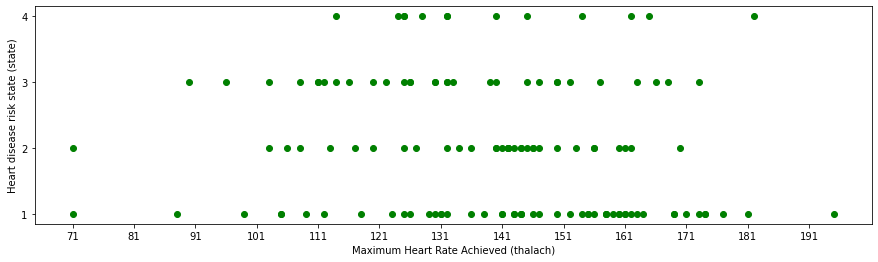

In [25]:
p_figure, p_axis = plt.subplots(figsize=figure_dim)
p_axis.scatter(x = df_diagnosed["thalach"], y = df_diagnosed["state"], c=plt_color)

plt.xticks(np.arange(df_diagnosed["thalach"].min(), df_diagnosed["thalach"].max(), x_step_size))
plt.yticks(np.arange(df_diagnosed["state"].min(), df_diagnosed["state"].max()+1, y_step_size))

plt.xlabel("Maximum Heart Rate Achieved (thalach)")
plt.ylabel("Heart disease risk state (state)")

plt.show()

### Explanation:

The scatter plot above shows the correlation between Maximum Heart Rate Achived(thalach) and the Heart Disease Risk State(state). Patients with High risk of Heart disease have their thalach in the range between <b>124-165</b>. So we can conclude that:

<ol>
    <li><b>High Risk Patients: Patients with lower thalach(Maximum Heart Rate) in the range of 71-112 have a lower risk of heart disease</b>, while </li>
    <li><b>Patients with higher thalach in the range of 124-165 have a higher risk of heart disease.</b></li>
    <li><b>Moderate Risk Patients: Patients with thalach range 111-170 have potential risk of hear disease, because they have risk state 3</b></li>
</ol>

### Scatter Plot to study the association between Heart Rate and No. of Major Vessels affected

In [26]:
## Configure plot

y_step_size = 1
x_step_size = 10

figure_dim = (15, 4)

plt_color = "blue"

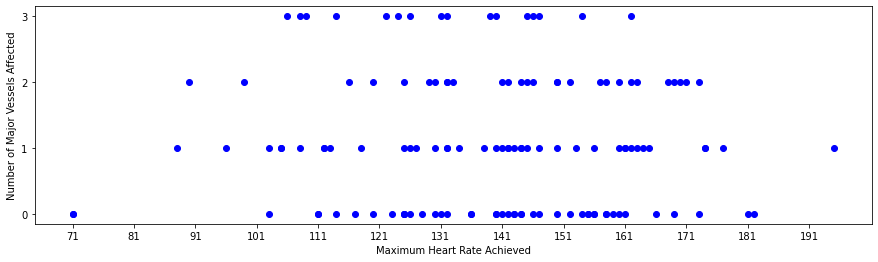

In [27]:
p_figure, p_axis = plt.subplots(figsize=figure_dim)
p_axis.scatter(x = df_diagnosed["thalach"], y = df_diagnosed["ca"], c=plt_color)

plt.xticks(np.arange(df_diagnosed["thalach"].min(), df_diagnosed["thalach"].max(), x_step_size))
plt.yticks(np.arange(df_diagnosed["ca"].min(), df_diagnosed["ca"].max()+1, y_step_size))

plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Number of Major Vessels Affected")

plt.show()

### Explanation:

The scatter plot above shows the correlation between Maximum Heart Rate Achived(thalach) and the Number of major vessels affected. Patients with Maximum Number of Vessels affected have their thalach in the range between <b>124-165</b>. So we can conclude that:

<ol>
    <li><b>Number of Vessels affected: Patients with lower thalach(Maximum Heart Rate) in the range of 71-112 have either 0 or less than 2 major vessels affected.</b>, while </li>
    <li><b>Patients with higher thalach in the range of 124-165 have a higher number of major vessels affected.</b></li>
</ol>

## Performing complex data manipulation

### Printing the average cholesterol level for different number of blocked blood vessels across gender. Reporting the pattern found in the result, if any.

In [28]:
#Print the average cholesterol level for different number of blocked blood vessels across gender.

choles=df_diagnosed[['ca', 'sex', 'chol']]
np.round(choles.groupby(['ca','sex']).mean(), decimals=2)

chol
ca sex        
0  F    284.60
   M    242.72
1  F    220.50
   M    243.00
2  F    294.67
   M    243.73
3  F    272.50
   M    271.92

### My findings:

From the dataset I can observe a few patters stated below 
<ul>
    <li>Male patients tend to have more number of vessels affected with higher Cholesterol level. So I can deduce that numer of vessels affected has a positive correlation with higher Cholesterol level only for the Male patients.</li>
    <li>Female patients records do not show any correlation between higher level of Cholesterol and the number of vessels affected.</li>
    <li>The average age group of the female patients is more than 56 and I can see a pattern of Cholesterol increase in female patients as they age. This pattern is missing in the Male data samples.</li>
</ul>

### Print the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar with asymptomatic chest pain

In [29]:
risk_index_list = np.where((df_diagnosed['cp'] == "asp") & (df_diagnosed['fbs'] == bool('True')) & (df_diagnosed['restecg'] >= 1))
patients_at_risk = df_diagnosed.iloc[risk_index_list]
patients_at_risk

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
9,53.0,M,asp,140.0,203.0,True,2,155.0,1,3.1,3,0,7,1
111,56.0,M,asp,125.0,249.0,True,2,144.0,1,1.2,2,1,3,1
113,43.0,F,asp,132.0,341.0,True,2,136.0,1,3.0,2,0,7,2
118,63.0,M,asp,130.0,330.0,True,2,132.0,1,1.8,1,3,7,3
120,48.0,M,asp,130.0,256.0,True,2,150.0,1,0.0,1,2,7,3
126,56.0,F,asp,200.0,288.0,True,2,133.0,1,4.0,3,2,7,3
146,57.0,M,asp,165.0,289.0,True,2,124.0,0,1.0,2,3,7,4
192,43.0,M,asp,132.0,247.0,True,2,143.0,1,0.1,2,0,7,1
236,56.0,M,asp,130.0,283.0,True,2,103.0,1,1.6,3,0,7,2
286,58.0,F,asp,170.0,225.0,True,2,146.0,1,2.8,2,2,6,2


In [30]:
percent_ecg_bs_acp = np.round(len(patients_at_risk) / len(df_diagnosed) * 100, decimals=2)

print(f"Percent of patients having abnormality in ECG & blood sugar with chest pain = {percent_ecg_bs_acp}")

Percent of patients having abnormality in ECG & blood sugar with chest pain = 8.4


### Calculate and print the average blood pressure of all observations with non-flat ST slopes of ECG.

#### Data Cleanup before aggragation

In [31]:
df_full_ds_clone = df_hd.copy(deep=True)

df_full_ds_clone.dropna(subset=["slope"],inplace=True)
df_full_ds_clone.dropna(subset=["trestbps"],inplace=True)

#### Calculate average and print

In [32]:
non_flat_slope_value = 2
rows = df_full_ds_clone.loc[(df_full_ds_clone['slope'] != non_flat_slope_value)]

avg_bp = np.round(rows['trestbps'].mean(), decimals=2)

print(f"average blood pressure of all observations with non-flat ST slopes of ECG {avg_bp}")

average blood pressure of all observations with non-flat ST slopes of ECG 131.17


### Create and print a dataframe of the heart rate, blood pressure and cholesterol levels for different age groups (based on 10 years interval).

#### Perform data processing - filling the NA fields with the min column value for the continuous variables

In [33]:
df_age_interval = df_hd.copy(deep=True)

df_age_interval['age'].fillna(value=df_age_interval['age'].min(),inplace=True)
df_age_interval['trestbps'].fillna(value=df_age_interval['trestbps'].min(),inplace=True)
df_age_interval['chol'].fillna(value=df_age_interval['chol'].min(),inplace=True)
df_age_interval['thalach'].fillna(value=df_age_interval['thalach'].min(),inplace=True)

#### Perform data processing - remove missing values for discrete variables

In [34]:
df_age_interval.dropna(subset=['sex'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,F,asp,140.0,241.0,no,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,M,tap,110.0,264.0,no,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,M,asp,144.0,193.0,yes,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
301,57.0,F,aap,130.0,236.0,no,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


#### Aggregate records into Age Groups and print

In [35]:
df_age_interval['age_groups'] = pd.cut(x=df_age_interval['age'], 
                                     bins=[20, 29, 39, 49, 59, 69, 79], 
                                     labels=['20-29','30-39','40-49','50-59','60-69','70-79'])
df_sorted = df_age_interval.sort_values(by=['age_groups'])


df_hr_bp_chol_by_age_group = df_sorted.groupby(['age_groups'])[['thalach', 'trestbps', 'chol']].mean()

df_hr_bp_chol_by_age_group['chol'] = df_hr_bp_chol_by_age_group['chol'].round(2)

df_hr_bp_chol_by_age_group['thalach'] = df_hr_bp_chol_by_age_group['thalach'].round(2)
df_hr_bp_chol_by_age_group['trestbps'] = df_hr_bp_chol_by_age_group['trestbps'].round(2)


print(df_hr_bp_chol_by_age_group)

            thalach  trestbps    chol
age_groups                           
20-29         85.56     98.00  134.67
30-39        169.50    124.29  219.79
40-49        158.17    124.03  235.16
50-59        147.85    133.58  247.57
60-69        140.43    135.32  259.74
70-79        130.50    135.80  249.60


### Finding the average cholesterol level of across gender for each age group. Please explain the results.

In [36]:
df_age_interval_data_subset = df_diagnosed.copy(deep=True)

df_age_interval_data_subset['age_groups'] = pd.cut(x=df_age_interval_data_subset['age'], 
                                     bins=[30, 39, 49, 59, 69, 79], 
                                     labels=['30-39','40-49','50-59','60-69','70-79'])

df_age_interval_aggr = df_age_interval_data_subset.groupby(['age_groups','sex'])['chol'].mean()
df_age_gender_chol = np.round(df_age_interval_aggr, decimals=2)

print(df_age_gender_chol)

age_groups  sex
30-39       F         NaN
            M      232.50
40-49       F      341.00
            M      235.30
50-59       F      280.40
            M      249.00
60-69       F      272.73
            M      248.00
70-79       F         NaN
            M      267.25
Name: chol, dtype: float64


### Explanation:
<ul>
<li>Cholesterol levels are higher in Female Patients than Male Patients on an average in the same Age Group.</li>
<li>In Female Patients, Average Cholesterol levels tends to spike in their 40s and going down gradually as they age in the 50s and 60s decades of their lives.</li>
<li>In Male Patients, Average Cholesterol levels generally rise as they age, increasing in 20 year intervals. Their cholestreol levels tend to gradually increase in their 30s and 40s, but rising sharply in their 50s. Again, holding off in 50s and 60s, but going upwards in their 70s.</li>
</ul>

### Drawing two scatter plots of cholesterol level, one against blood pressure and another against heart rate. Draw them in two subplots of the same plot.

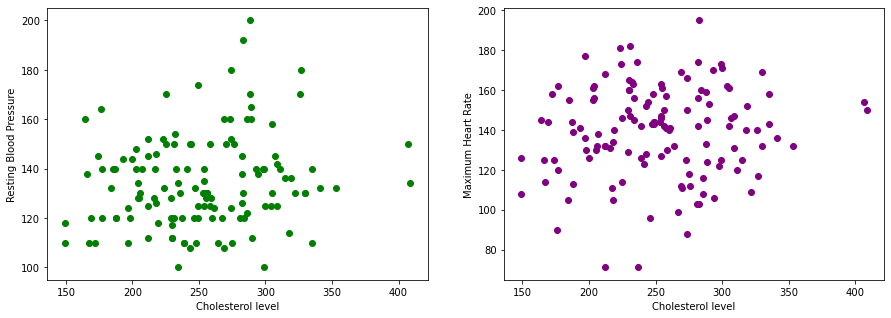

In [37]:
fig, ax = plt.subplots(figsize=(15, 5), nrows = 1, ncols=2, sharex='col')
ax[0].scatter(x = df_diagnosed["chol"], y = df_diagnosed["trestbps"], c="green")
ax[0].set(xlabel='Cholesterol level', ylabel='Resting Blood Pressure')


ax[1].scatter(x = df_diagnosed["chol"], y = df_diagnosed["thalach"], c="purple")
ax[1].set(xlabel='Cholesterol level', ylabel='Maximum Heart Rate')

plt.show()

### Visualizing the cholesterol level against number of blood vessel blocked for male and female using line plot. Explain the graph base on your observation.

In [38]:
def drop_na(df, columns):
    for column in columns:
        df = df.dropna(subset=[column])
    return df

In [39]:
def unique_ca_values(df):
    vessels = df['ca'].unique()
    return sorted(vessels)

#### Populating data for Female and Male subplots

In [40]:
df_hd_cleaned = drop_na(df_hd, ['ca', 'sex', 'chol'])

df_cholesterol_vb = np.round(df_hd_cleaned.groupby(['ca','sex'])['chol'].mean(), decimals=2)
female_chol_vb = []
male_chol_vb = []

for index, val in df_cholesterol_vb.iteritems():
    row, gender = index
    if gender == 'F':
        female_chol_vb.append(val)
    else:
        male_chol_vb.append(val)

#### Drawing the line plots

[255.95, 271.79, 274.83, 272.5]


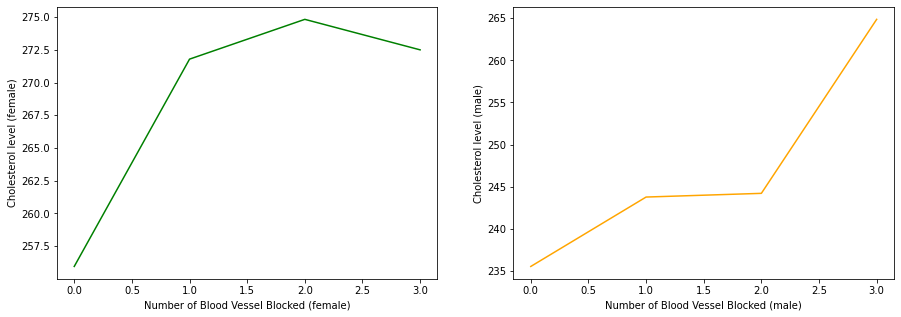

In [41]:
fig, ax = plt.subplots(figsize=(15, 5), nrows = 1, ncols=2, sharex='col')

vb_list = unique_ca_values(df_hd_cleaned)

df_chol_vb_female = df_diagnosed[df_diagnosed['sex'] == 'F']
ax[0].plot(vb_list, female_chol_vb, c="green")
ax[0].set(xlabel='Number of Blood Vessel Blocked (female)', ylabel='Cholesterol level (female)')


df_chol_vb_male = df_diagnosed[df_diagnosed['sex'] == 'M']
ax[1].plot(vb_list, male_chol_vb, c="orange")
print(female_chol_vb)

ax[1].set(xlabel='Number of Blood Vessel Blocked (male)', ylabel='Cholesterol level (male)')

plt.show()

### Explanation:

1. Cholesterol level doesn't have any realtion or association with the number of vessels blocked for the Female patients, as the change is sporadic. 

2. For the Male Patients high levels of Cholesterol has a positive correlation with Number of Vessels blocked.

### Drawing a group bar diagram of heart rate, blood pressure and total number of patients, based on age groups defined in question 9. Explain your observation from the graph.

In [43]:
def drop_na(df, columns):
    df_hr_bp_chol_by_gender.groupby(['age_groups'])
    for column in columns:
        df = df.dropna(subset=[column])
    return df

#### Defining Age Group bins

In [44]:
age_group_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df_avg_bp = np.round(df_hr_bp_chol_by_age_group['trestbps'].values, decimals=2)
df_avg_hr = np.round(df_hr_bp_chol_by_age_group['thalach'].values, decimals=2)
df_count = np.round(df_sorted.groupby(['age_groups'])['age_groups'].count())

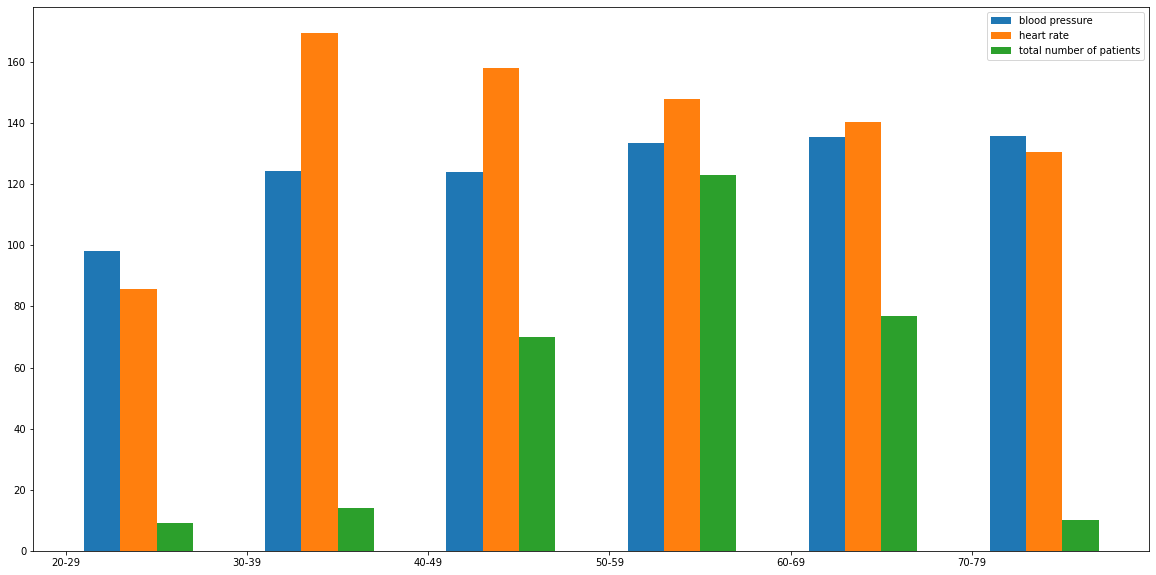

In [45]:
x = np.arange(len(age_group_labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x + width*1, df_avg_bp, width, label='blood pressure')
ax.bar(x + width*2, df_avg_hr, width, label='heart rate')
ax.bar(x + width*3, df_count, width, label='total number of patients')
ax.xaxis.set_major_locator(ticker.FixedLocator([0, 1, 2, 3, 4, 5, ]))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(age_group_labels))
plt.legend()
plt.show()

### Observations
<ol>
    <li>The Heart Rate gradually decreases with age</li>
    <li>The blood pressure is increasing with an increase in age.</li>
    <li>Heart diseases increase in the age group of 50-59</li>
</ol>

### Adding two more columns named [‘num_male_patients’, ‘num_female_patients’] and having values of the number of male and female patients affected by heart disease in each age group respectively. Save the combined dataset to a csv file named ‘age_group_stat.csv’ in the same directory of your code file.

In [46]:
df_male = df_sorted[df_sorted['sex'] == 'M']

df_male_count_age_group = df_male.groupby(['age_groups'])['sex'].count()

df_male_count_age_group.head()

age_groups
20-29     1
30-39     9
40-49    51
50-59    89
60-69    46
Name: sex, dtype: int64

In [47]:
df_female = df_sorted[df_sorted['sex'] == 'F']

df_female_count_age_group = df_female.groupby(['age_groups'])['sex'].count()

df_female_count_age_group.head()

age_groups
20-29     0
30-39     5
40-49    19
50-59    34
60-69    31
Name: sex, dtype: int64

In [50]:
df_hr_bp_chol_by_age_group['num_male_patients'] = df_male_count_age_group.tolist()

df_hr_bp_chol_by_age_group['num_female_patients'] = df_female_count_age_group.tolist()

df_hr_bp_chol_by_age_group.head(50)

,thalach,trestbps,chol,num_male_patients,num_female_patients
age_groups,,,,,
20-29,85.56,98.00,134.67,1,0
30-39,169.50,124.29,219.79,9,5
40-49,158.17,124.03,235.16,51,19
50-59,147.85,133.58,247.57,89,34
60-69,140.43,135.32,259.74,46,31
70-79,130.50,135.80,249.60,5,5


In [52]:
df_hr_bp_chol_by_age_group.to_csv("age_group_stat.csv")

### Replacing all the rows where the ‘state’ is null with its immediate previous row. Finally, display and save the resultant dataset to a csv file named ‘clean_data.csv’ in the same directory of your code file.

In [57]:
df_diagnosed_all['state'].fillna(method='ffill', inplace=True)
print(df_diagnosed_all)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1    67.0    M  asp     160.0  286.0   no      2.0    108.0    1.0      1.5   
2    67.0    M  asp     120.0  229.0   no      2.0    129.0    1.0      2.6   
6    62.0    F  NaN     140.0  268.0   no      2.0    160.0    0.0      3.6   
8    63.0    M  asp     130.0  254.0   no      2.0    147.0    0.0      1.4   
9    53.0    M  asp     140.0  203.0  yes      2.0    155.0    1.0      3.1   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0    F  asp     140.0  241.0   no      0.0    123.0    1.0      0.2   
298  45.0    M  tap     110.0  264.0   no      0.0    132.0    0.0      1.2   
299  68.0    M  asp     144.0  193.0  yes      0.0    141.0    0.0      3.4   
300   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
301  57.0    F  aap     130.0  236.0   no      2.0    174.0    0.0      0.0   

     slope   ca  thal  state  
1      2.0  3.0   3.

In [58]:
df_diagnosed_all.to_csv("clean_data.csv")